# Car Price prediction using Machine Learning

Language- Python


**Author- Naman Sahu**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/data/Oasis Infobyte/car_prediction.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
200,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
201,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
202,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.shape

(204, 26)

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            204 non-null    int64  
 1   symboling         204 non-null    int64  
 2   CarName           204 non-null    object 
 3   fueltype          204 non-null    object 
 4   aspiration        204 non-null    object 
 5   doornumber        204 non-null    object 
 6   carbody           204 non-null    object 
 7   drivewheel        204 non-null    object 
 8   enginelocation    204 non-null    object 
 9   wheelbase         204 non-null    float64
 10  carlength         204 non-null    float64
 11  carwidth          204 non-null    float64
 12  carheight         204 non-null    float64
 13  curbweight        204 non-null    int64  
 14  enginetype        204 non-null    object 
 15  cylindernumber    204 non-null    object 
 16  enginesize        204 non-null    int64  
 1

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,103.259804,0.838235,98.740686,173.962745,65.884804,53.753922,2548.730392,125.931373,3.328725,3.257843,10.135882,103.343137,5125.735294,25.279412,30.818627,13165.321897
std,59.351472,1.246990,6.032275,12.305131,2.124990,2.413802,512.657656,39.324784,0.271107,0.312430,3.980666,38.053241,478.077996,6.501638,6.835250,7847.298918
min,1.000000,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000
25%,52.750000,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7784.750000
50%,103.500000,1.000000,96.950000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000
75%,154.250000,2.000000,102.400000,182.050000,66.675000,55.500000,2928.250000,141.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.750000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,308.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<Figure size 4000x5000 with 0 Axes>

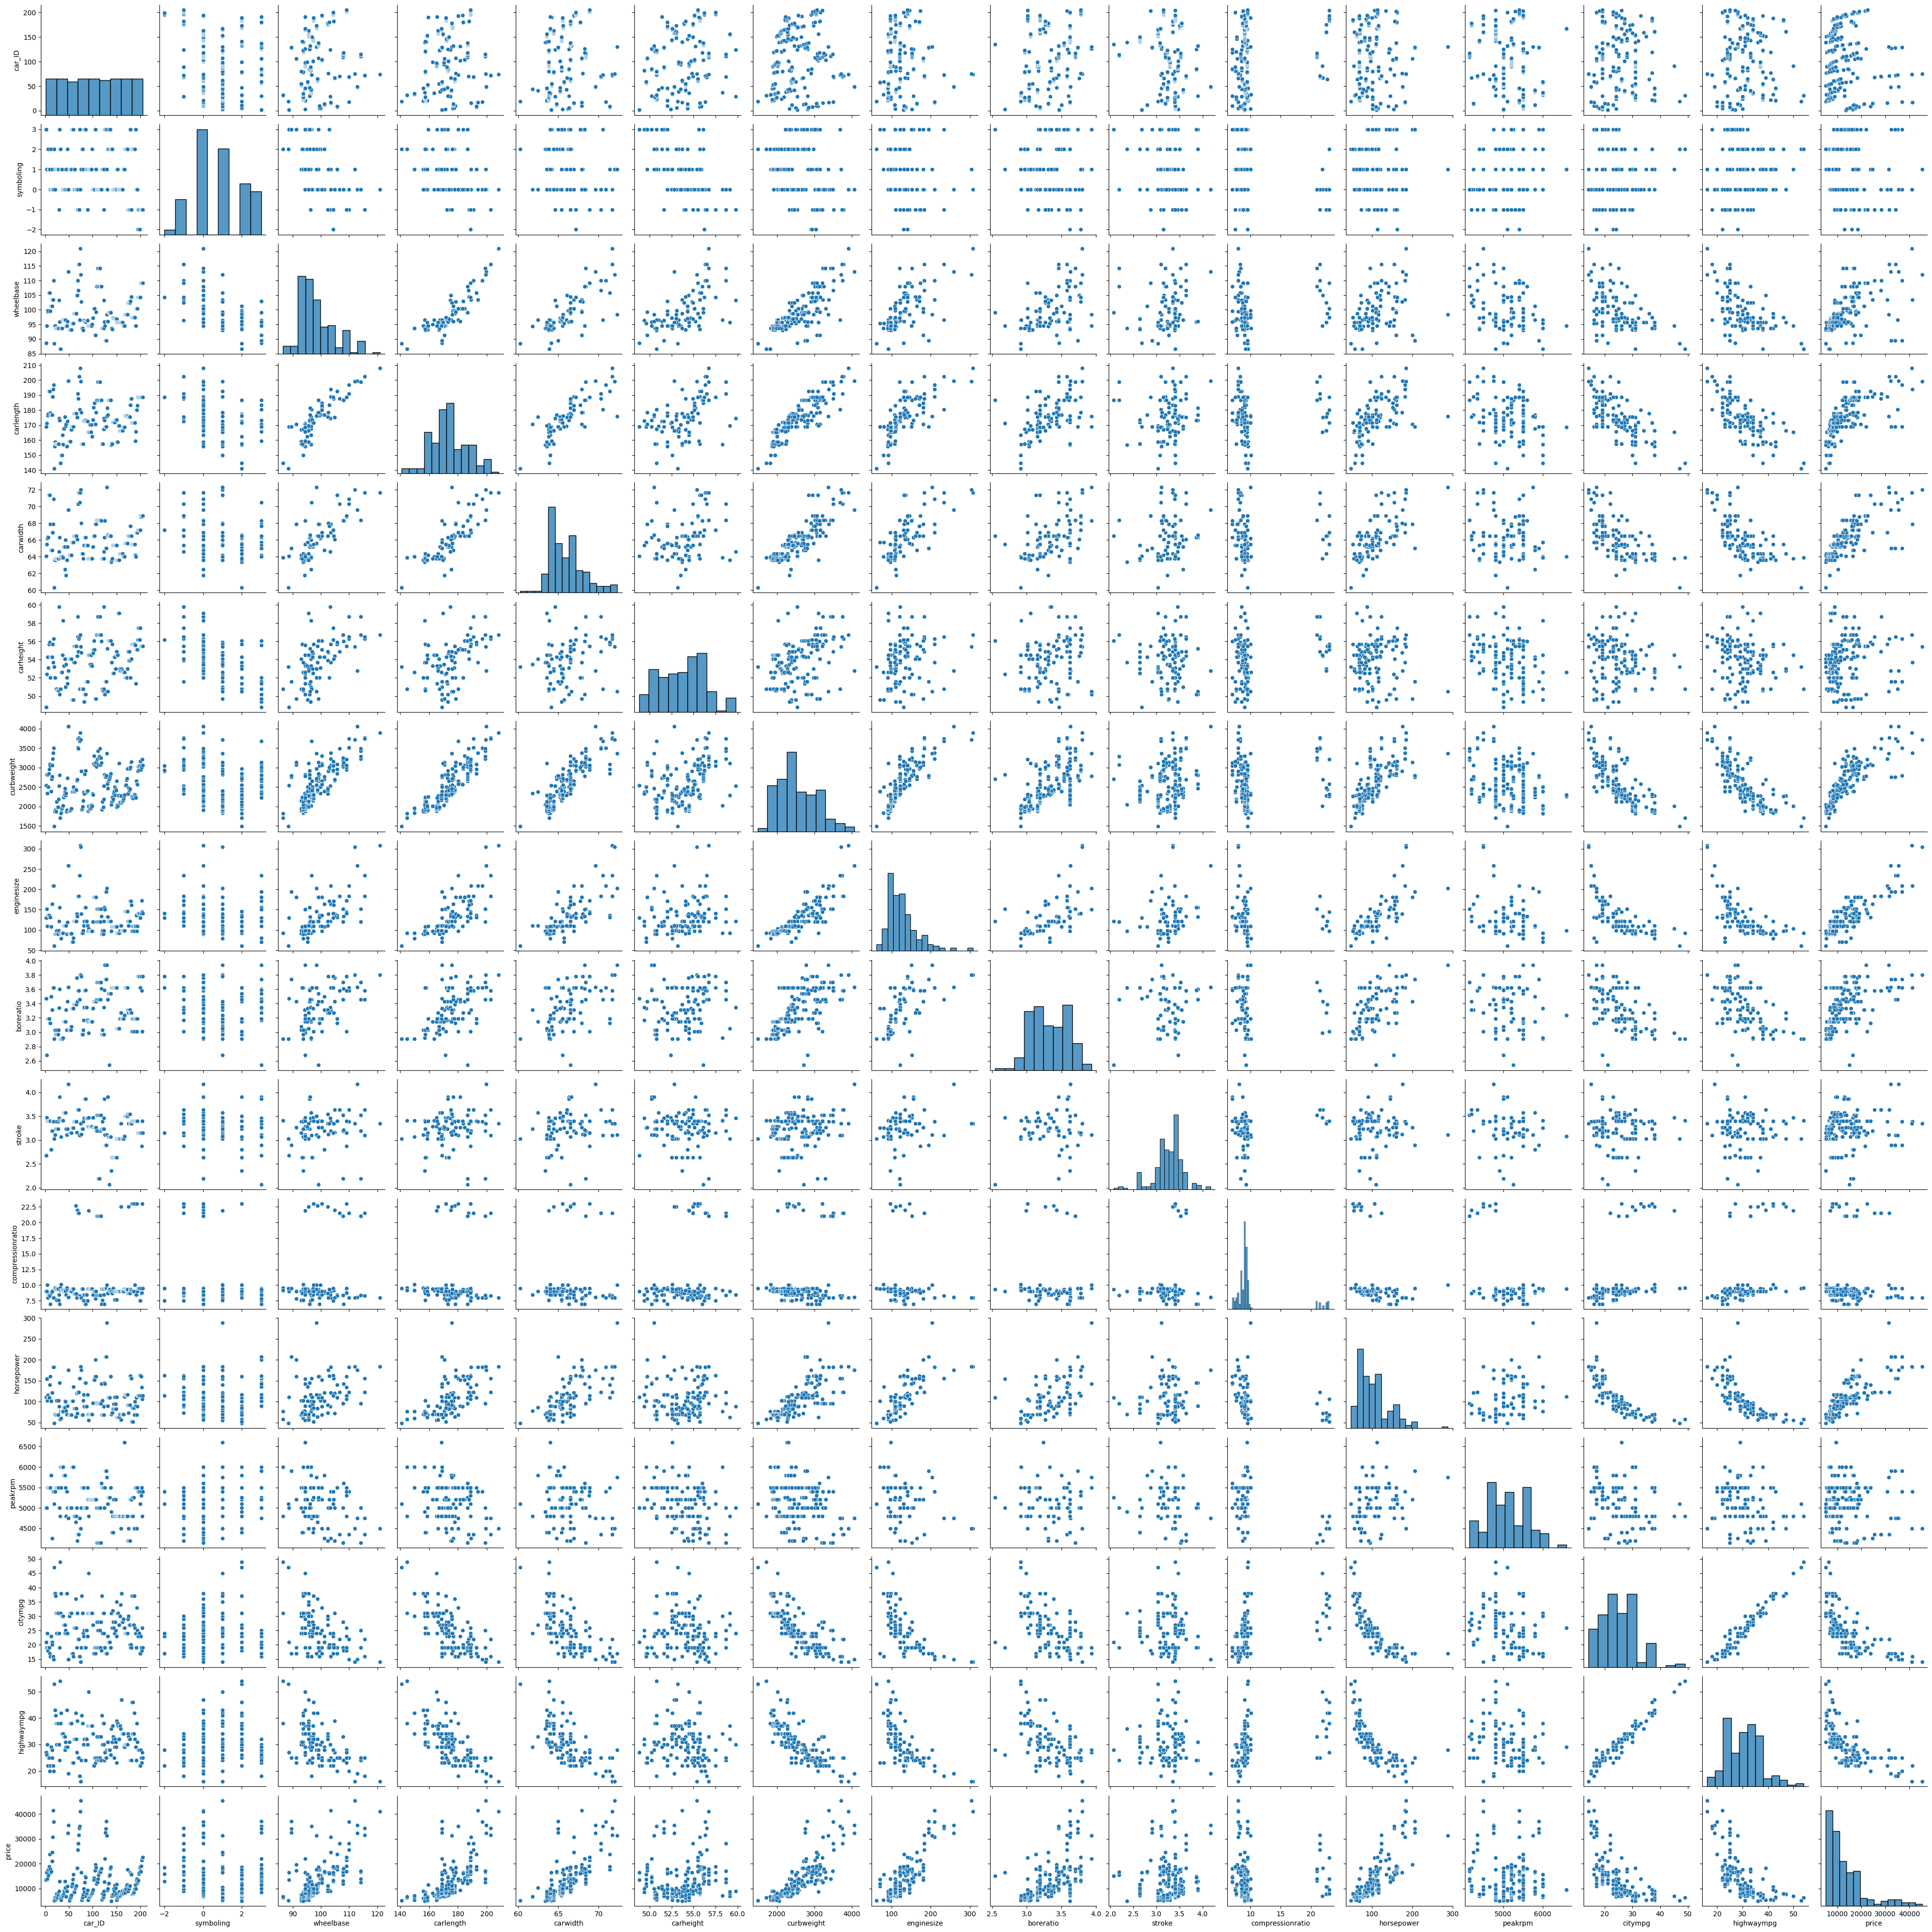

In [9]:
plt.figure(figsize=(40,50))
sns.pairplot(df)
plt.show()

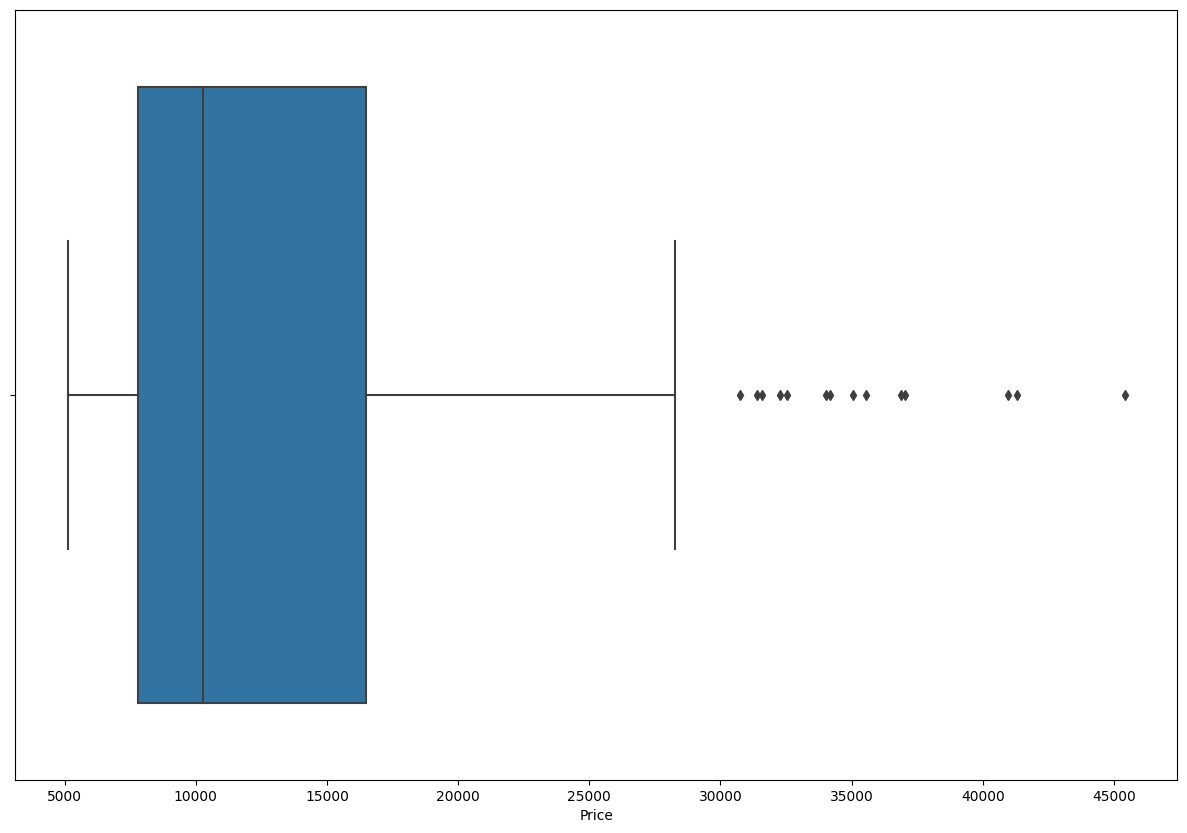

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(x='price',data=df)
plt.xlabel('Price')
plt.show()

In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
# Check unique values for categorical variables
#df.columns
object_columns = df.select_dtypes(include='object')

for i in object_columns:
  print(df[i].value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 146, dtype: int64
gas       184
diesel     20
Name: fueltype, dtype: int64
std      167
turbo     37
Name: aspiration, dtype: int64
four    115
two      89
Name: doornumber, dtype: int64
sedan          95
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     75
4wd      9
Name: drivewheel, dtype: int64
front    201
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
dohc      12
ohcv      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four     159
six       24
five      11
eight      5
two        4
three      1
Name: cylindernumber, dtype: int64
mpfi    93
2bbl    66
idi 

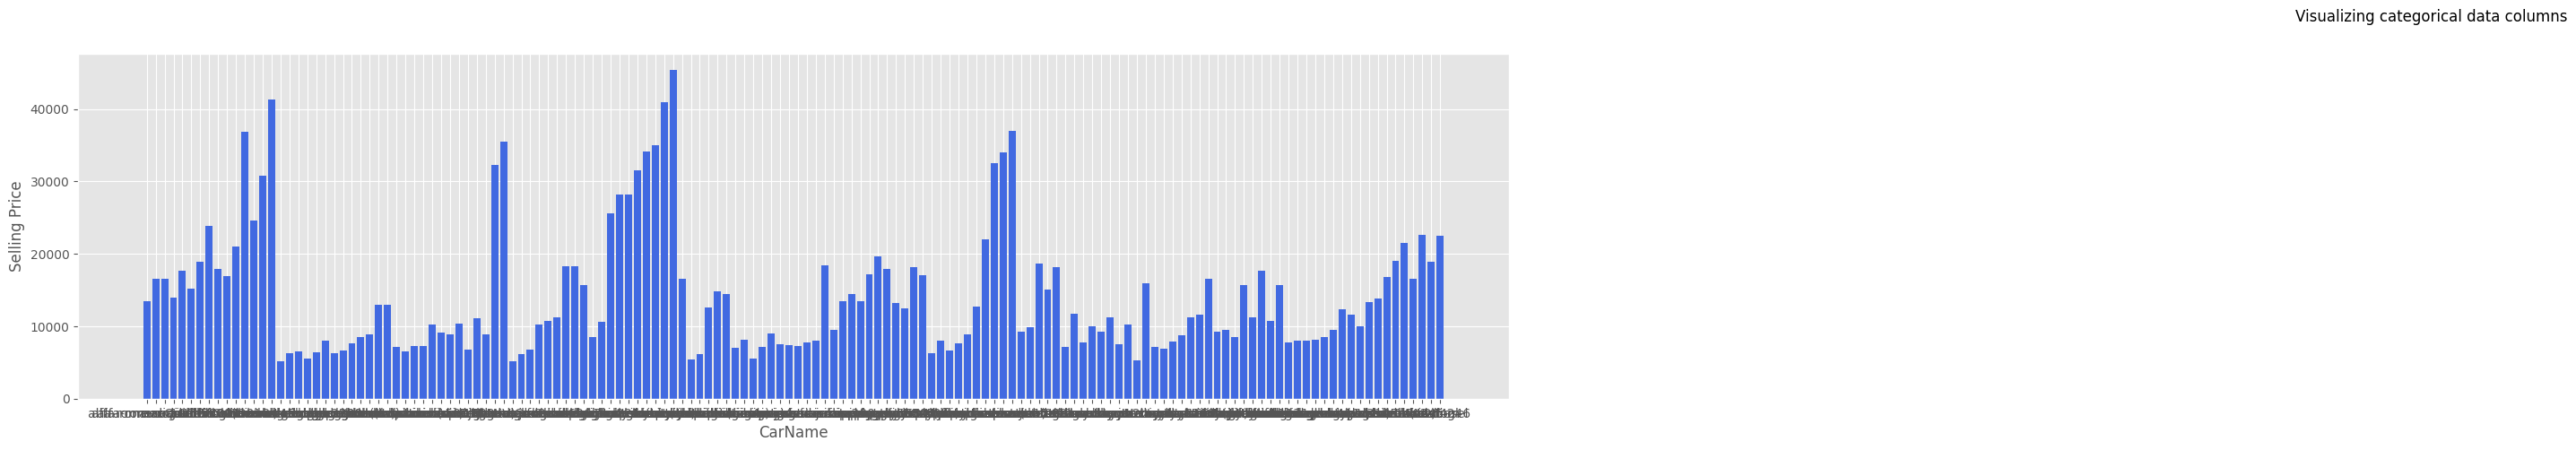

In [13]:
from matplotlib import style
style.use('ggplot')
fig = plt.figure(figsize=(70,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(df['CarName'],df['price'], color='royalblue')
plt.xlabel("CarName")
plt.ylabel("Selling Price")
plt.show()

In [14]:
#Removing columns CarName as it is contains huge amount of data which is giving irregural behaviour
object_cols= object_columns.drop(object_columns.columns[0], axis=1)
#df = df.drop(df.columns[0], axis=1)
object_cols

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
199,gas,std,four,sedan,rwd,front,ohc,four,mpfi
200,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
201,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
202,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


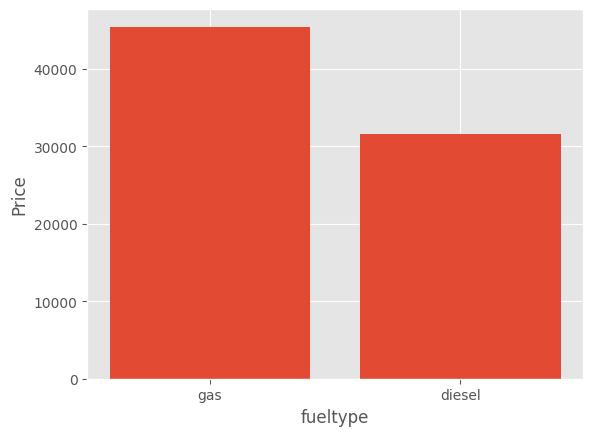

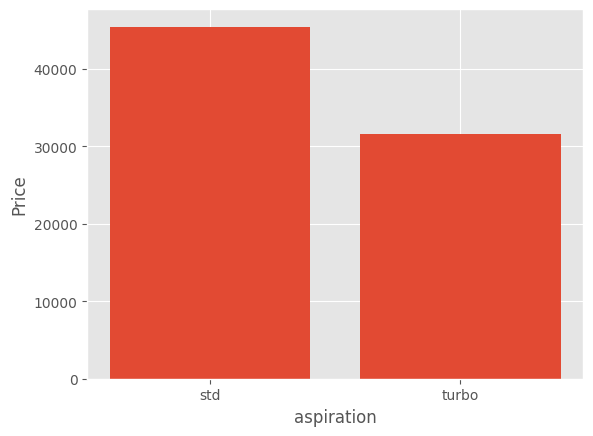

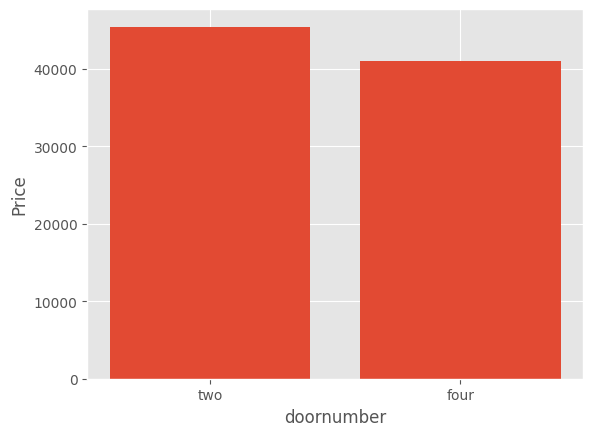

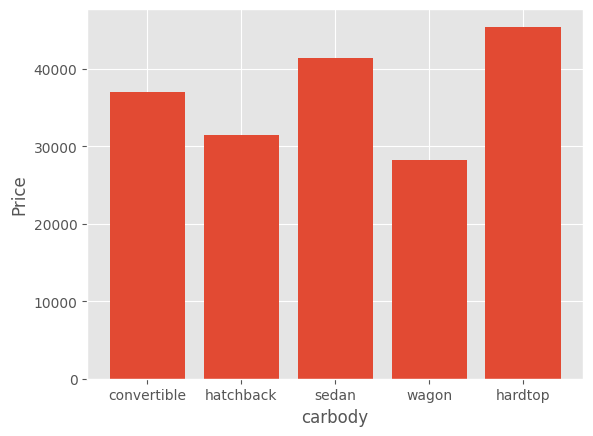

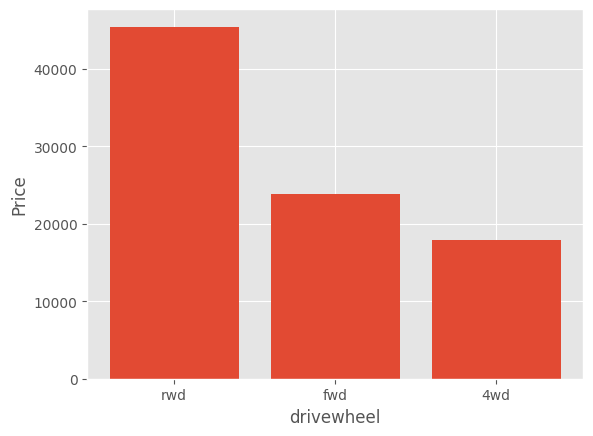

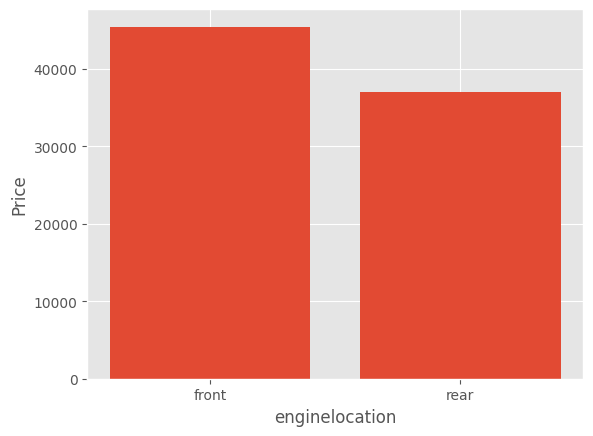

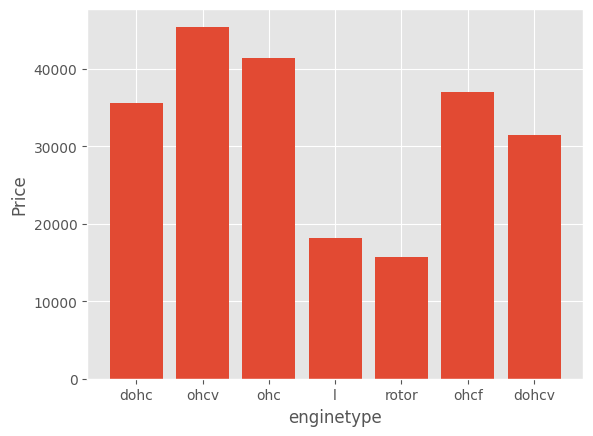

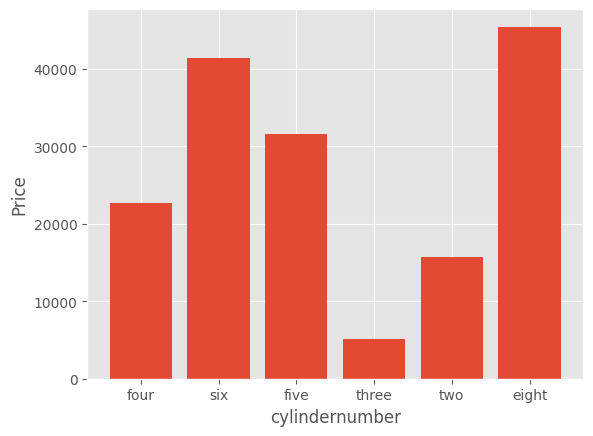

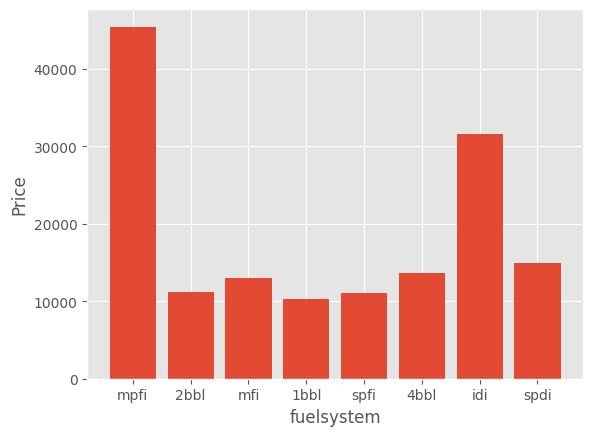

In [15]:
# Plot bar charts of selling price vs categorical variables
style.use('ggplot')
#fig = plt.figure(figsize=(30,10))
fig.suptitle('Visualizing categorical data columns')
for i in object_cols:
  plt.bar(df[i],df['price'])
  plt.xlabel(i)
  plt.ylabel("Price")
  plt.show()

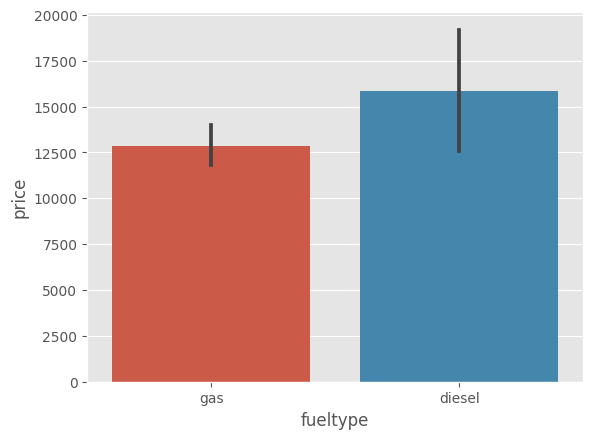

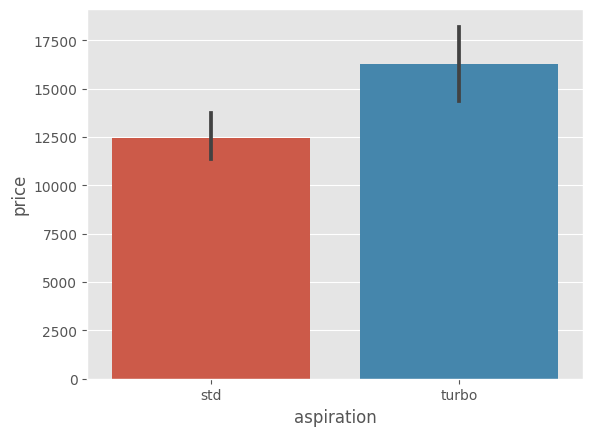

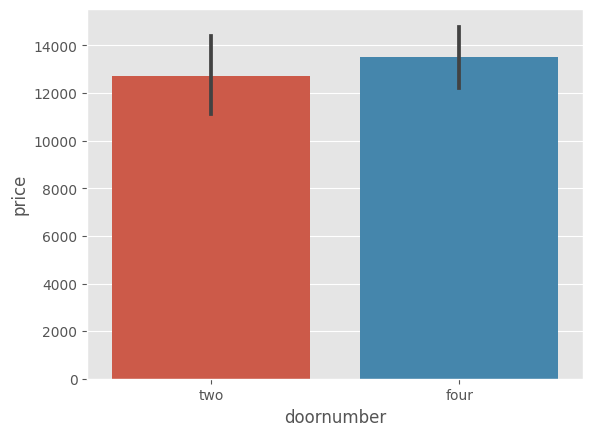

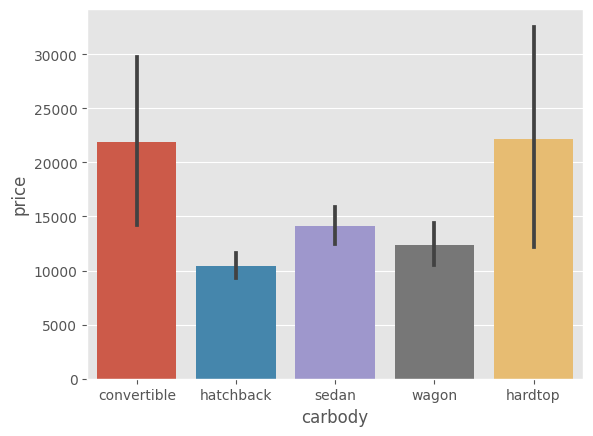

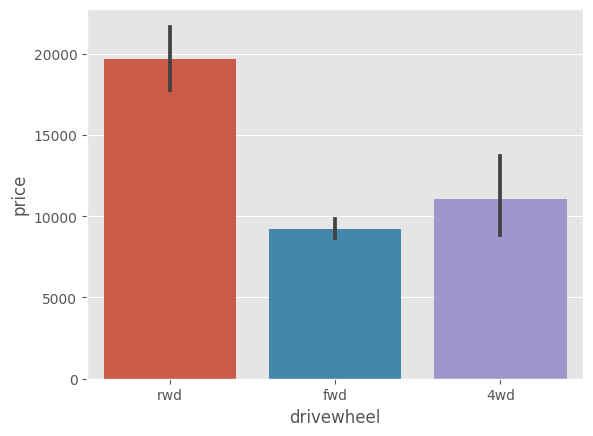

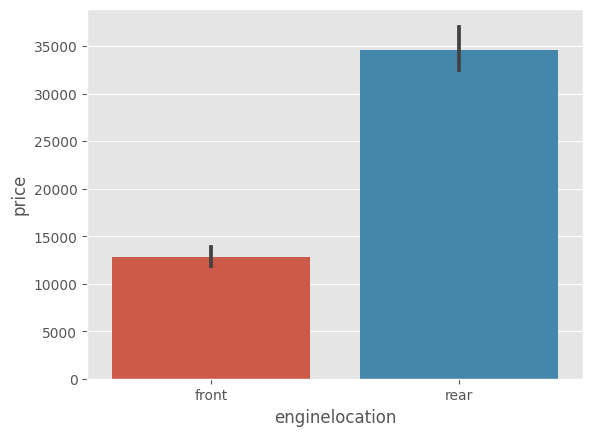

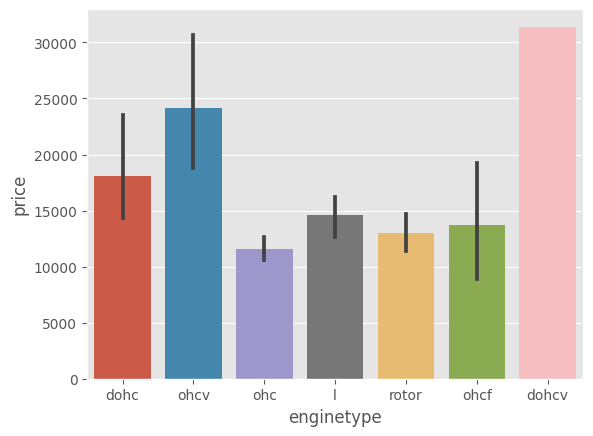

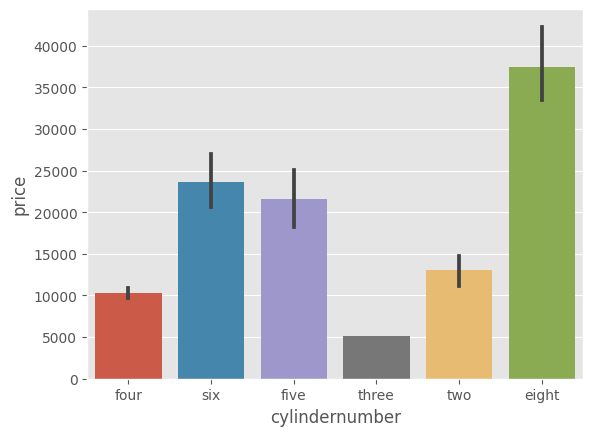

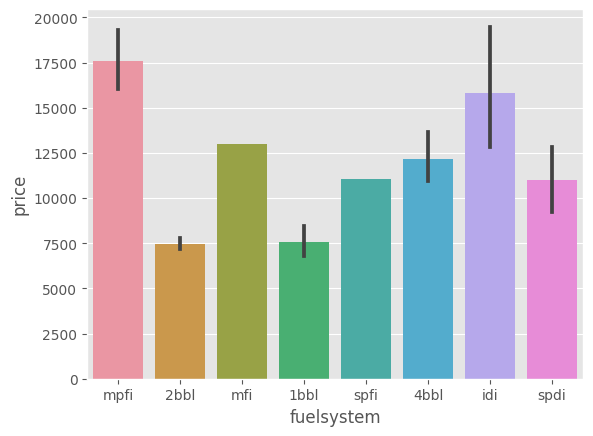

In [16]:
# Plot bar charts of selling price vs categorical variables using seaborn
#fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
for i in object_cols:
  sns.barplot(x=df[i], y=df['price'])
  plt.show()

In [17]:
fuel_types = df['fueltype'].unique()
fuel_types
df['fueltype'].replace({'gas':0,'diesel':1},inplace=True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,201,-1,volvo 145e (sw),0,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
200,202,-1,volvo 144ea,0,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
201,203,-1,volvo 244dl,0,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
202,204,-1,volvo 246,1,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [18]:
asp_types = df['aspiration'].unique()
asp_types
df['aspiration'].replace({'std':0,'turbo':1},inplace=True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,201,-1,volvo 145e (sw),0,0,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
200,202,-1,volvo 144ea,0,1,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
201,203,-1,volvo 244dl,0,0,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
202,204,-1,volvo 246,1,1,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [19]:
door_types =df['doornumber'].unique()
door_types
df['doornumber'].replace({'two':2,'four':4},inplace=True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,201,-1,volvo 145e (sw),0,0,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
200,202,-1,volvo 144ea,0,1,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
201,203,-1,volvo 244dl,0,0,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
202,204,-1,volvo 246,1,1,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [20]:
carbody_types=df['carbody'].unique()
carbody_types
df['carbody'].replace({'convertible':0, 'hatchback':1, 'sedan':2, 'wagon':3, 'hardtop':4},inplace=True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,0,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,0,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,2,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,2,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,201,-1,volvo 145e (sw),0,0,4,2,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
200,202,-1,volvo 144ea,0,1,4,2,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
201,203,-1,volvo 244dl,0,0,4,2,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
202,204,-1,volvo 246,1,1,4,2,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [21]:
drivewheel_types=df['drivewheel'].unique()
drivewheel_types
df['drivewheel'].replace({'rwd':0,'fwd':1, '4wd':2},inplace=True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,0,0,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,0,0,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,0,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,2,1,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,2,2,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,201,-1,volvo 145e (sw),0,0,4,2,0,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
200,202,-1,volvo 144ea,0,1,4,2,0,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
201,203,-1,volvo 244dl,0,0,4,2,0,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
202,204,-1,volvo 246,1,1,4,2,0,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [22]:
enginelocation_types=df['enginelocation'].unique()
enginelocation_types
df['enginelocation'].replace({'front':0, 'rear':1},inplace=True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,0,0,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,0,0,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,0,0,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,2,1,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,2,2,0,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,201,-1,volvo 145e (sw),0,0,4,2,0,0,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
200,202,-1,volvo 144ea,0,1,4,2,0,0,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
201,203,-1,volvo 244dl,0,0,4,2,0,0,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
202,204,-1,volvo 246,1,1,4,2,0,0,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [23]:
fuelsystem_types=df['fuelsystem'].unique()
fuelsystem_types
df['fuelsystem'].replace({'mpfi':0, '2bbl':1, 'mfi':2, '1bbl':3, 'spfi':4, '4bbl':5, 'idi':6, 'spdi':7},inplace=True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,2,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,2,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,201,-1,volvo 145e (sw),0,0,4,2,0,0,109.1,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
200,202,-1,volvo 144ea,0,1,4,2,0,0,109.1,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
201,203,-1,volvo 244dl,0,0,4,2,0,0,109.1,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
202,204,-1,volvo 246,1,1,4,2,0,0,109.1,...,145,6,3.01,3.40,23.0,106,4800,26,27,22470.0


In [24]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [25]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['CarName', 'enginetype', 'cylindernumber'], dtype='object')

In [26]:
enginetype_types=df['enginetype'].unique()
enginetype_types
df['enginetype'].replace({'dohc':0, 'ohcv':1, 'ohc':2, 'l':3, 'rotor':4, 'ohcf':5, 'dohcv':6},inplace=True)
df['enginetype']

0      0
1      0
2      1
3      2
4      2
      ..
199    2
200    2
201    1
202    2
203    2
Name: enginetype, Length: 204, dtype: int64

In [27]:
cylinderno_types=df['cylindernumber'].unique()
cylinderno_types
df['cylindernumber'].replace({'four':4, 'six':6, 'five':5, 'three':3, 'two':2, 'eight':8},inplace=True)
df['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
199    4
200    4
201    6
202    6
203    4
Name: cylindernumber, Length: 204, dtype: int64

In [28]:
df.corr()

<ipython-input-28-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.155045,0.124402,0.065834,0.186339,0.169705,-0.057051,0.051051,0.132454,0.178182,...,-0.013709,-0.066935,0.264392,-0.169150,0.152123,0.002678,-0.205383,0.007802,0.002497,-0.098754
symboling,-0.155045,1.000000,-0.195661,-0.061512,-0.670637,-0.398678,0.037856,0.212312,-0.531143,-0.355076,...,-0.095660,0.014477,-0.127821,-0.014050,-0.177635,0.087651,0.273089,-0.042398,0.028328,-0.072123
fueltype,0.124402,-0.195661,1.000000,0.400964,0.190316,0.158031,-0.134736,-0.040278,0.309519,0.216140,...,0.082099,0.682262,0.055803,0.240825,0.985453,-0.164091,-0.477514,0.255214,0.190092,0.112570
aspiration,0.065834,-0.061512,0.400964,1.000000,0.029299,0.021842,-0.069545,-0.057505,0.259178,0.239176,...,0.126650,0.472583,0.214839,0.220819,0.296574,0.261505,-0.184118,-0.208581,-0.261745,0.188377
doornumber,0.186339,-0.670637,0.190316,0.029299,1.000000,0.450338,0.092857,-0.138873,0.452089,0.409865,...,0.050368,-0.021788,0.124143,-0.020043,0.180404,-0.109486,-0.249952,-0.023063,-0.048045,0.048766
carbody,0.169705,-0.398678,0.158031,0.021842,0.450338,1.000000,-0.055670,0.126712,0.368453,0.377116,...,0.177039,-0.053995,0.224426,0.002474,0.156350,0.044314,-0.146768,-0.094455,-0.125847,0.161212
drivewheel,-0.057051,0.037856,-0.134736,-0.069545,0.092857,-0.055670,1.000000,-0.149134,-0.458518,-0.481283,...,-0.528227,0.032556,-0.479642,-0.081808,-0.125933,-0.517407,0.037997,0.443865,0.446316,-0.574635
enginelocation,0.051051,0.212312,-0.040278,-0.057505,-0.138873,0.126712,-0.149134,1.000000,-0.187609,-0.050388,...,0.211988,-0.083175,0.185789,-0.140272,-0.019564,0.333608,0.198345,-0.155958,-0.104255,0.333400
wheelbase,0.132454,-0.531143,0.309519,0.259178,0.452089,0.368453,-0.458518,-0.187609,1.000000,0.875841,...,0.591327,0.006636,0.487763,0.166294,0.249129,0.357260,-0.360091,-0.469846,-0.544544,0.582400
carlength,0.178182,-0.355076,0.216140,0.239176,0.409865,0.377116,-0.481283,-0.050388,0.875841,1.000000,...,0.693155,-0.086383,0.604935,0.142258,0.156843,0.549151,-0.286892,-0.666841,-0.701016,0.679928


<ipython-input-29-6fbe3f4b9352>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


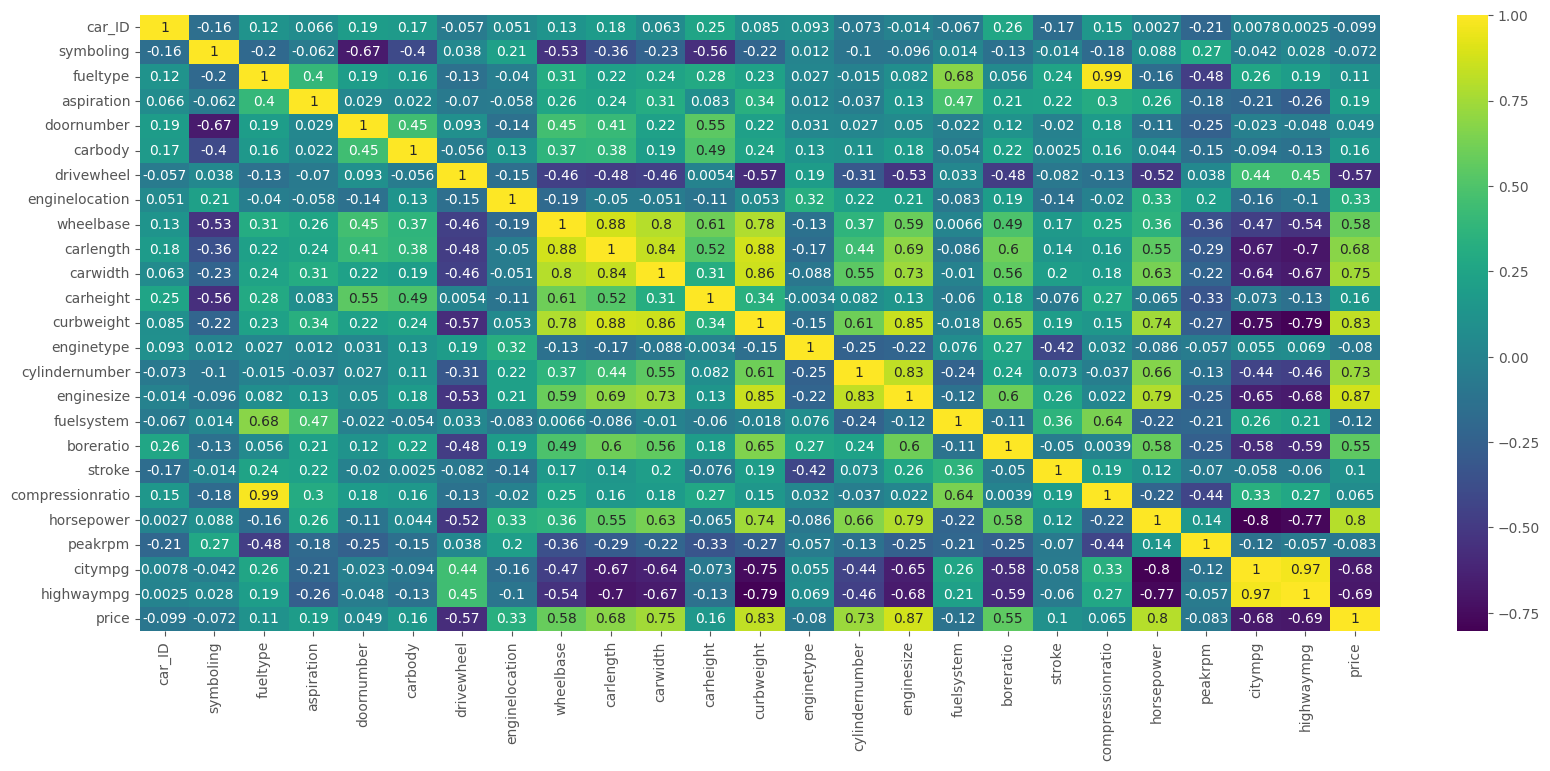

In [29]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [30]:
#Data Modeling
#splitting data into x and y
x = df.drop(['CarName','price'], axis = 1)
y = df['price']

In [31]:
x.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9.0,111,5000,21,27
1,2,3,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9.0,111,5000,21,27
2,3,1,0,0,2,1,0,0,94.5,171.2,...,6,152,0,2.68,3.47,9.0,154,5000,19,26
3,4,2,0,0,4,2,1,0,99.8,176.6,...,4,109,0,3.19,3.40,10.0,102,5500,24,30
4,5,2,0,0,4,2,2,0,99.4,176.6,...,5,136,0,3.19,3.40,8.0,115,5500,18,22


In [32]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [34]:
lr = LinearRegression()
lr.fit(x_train,y_train)

training_data_prediction = lr.predict(x_train)

In [35]:
from sklearn import metrics

error_1 = metrics.r2_score(y_train, training_data_prediction)
print('R2 Squared Error of Training Data:', error_1)

R2 Squared Error of Training Data: 0.9130191088834458


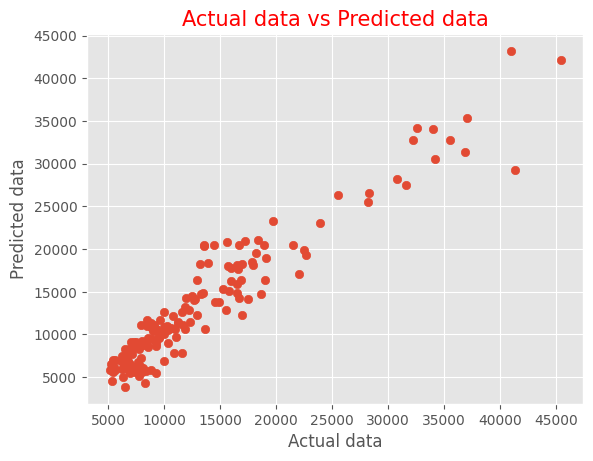

In [36]:
#Visualization of predicted and actual training data
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.title('Actual data vs Predicted data', c='r',size=15)
plt.show()

In [37]:
test_data_prediction = lr.predict(x_test)
error_2 = metrics.r2_score(y_test, test_data_prediction)
print('R2 Squared Score of Testing Data:', error_2)

R2 Squared Score of Testing Data: 0.5628421498704175


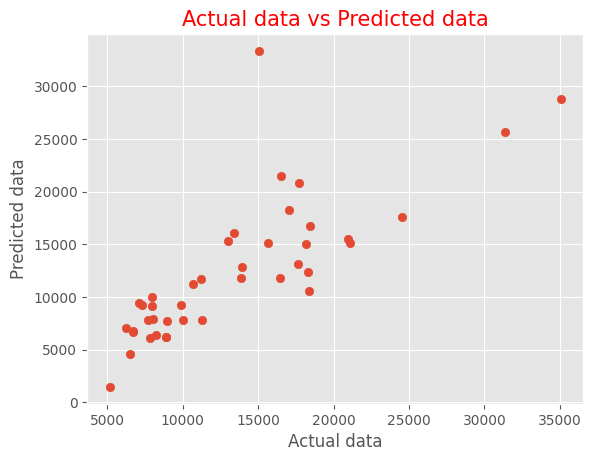

In [38]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.title('Actual data vs Predicted data' , c='r', size=15)
plt.show()

In [39]:
#Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lr.predict(x_test)
r2score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R-squared score:", r2score)
print("Root mean squared error:", rmse)

R-squared score: 0.5628421498704175
Root mean squared error: 4406.830079878248


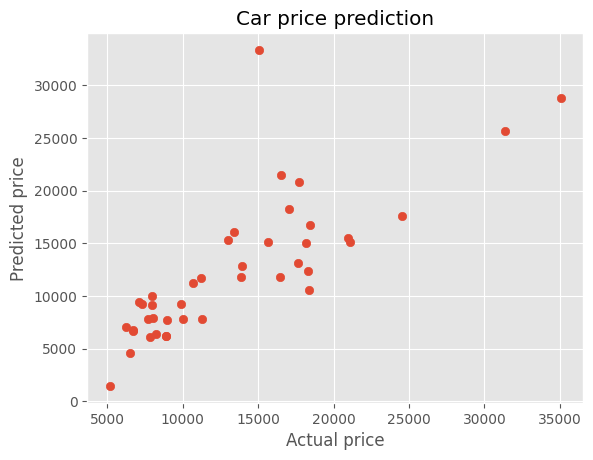

In [40]:
#Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Car price prediction")
plt.show()

In [41]:
# Additional steps to improve the model:
# 1. Regularization to prevent overfitting
from sklearn.linear_model import Ridge, Lasso

# Train Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

# Train Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

# Evaluate Ridge and Lasso models
ridge_pred = ridge.predict(x_test)
ridge_r2score = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("Ridge R-squared score:", ridge_r2score)
print("Ridge Root mean squared error:", ridge_rmse)

lasso_pred = lasso.predict(x_test)
lasso_r2score = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print("Lasso R-squared score:", lasso_r2score)
print("Lasso Root mean squared error:", lasso_rmse)

Ridge R-squared score: 0.6244222554458554
Ridge Root mean squared error: 4084.6710674217575
Lasso R-squared score: 0.5642011643123566
Lasso Root mean squared error: 4399.974881575625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.089e+08, tolerance: 1.068e+06
  model = cd_fast.enet_coordinate_descent(


In [42]:
# 2. Feature scaling to improve convergence of gradient-based algorithms
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train linear regression model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(x_train_scaled, y_train)

# Evaluate scaled model
y_pred_scaled = model_scaled.predict(x_test_scaled)
r2score_scaled = r2_score(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print("Scaled R-squared score:", r2score_scaled)
print("Scaled Root mean squared error:", rmse_scaled)

Scaled R-squared score: 0.5628421498704497
Scaled Root mean squared error: 4406.830079878086


Regularization to prevent overfitting: In addition to the basic linear regression model, we also train Ridge and Lasso regression models, which introduce a penalty term to the loss function to discourage large coefficients and thus prevent overfitting. We also evaluate these models on the test set.

# **Thank You**